### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

### bank client data:
  - 1 - age (numeric)
  - 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
  - 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  - 4 - education (categorical: "unknown","secondary","primary","tertiary")
  - 5 - default: has credit in default? (binary: "yes","no")
  - 6 - balance: average yearly balance, in euros (numeric) 
  - 7 - housing: has housing loan? (binary: "yes","no")
  - 8 - loan: has personal loan? (binary: "yes","no")
   ### related with the last contact of the current campaign:
  - 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
 - 10 - day: last contact day of the month (numeric)
 - 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 - 12 - duration: last contact duration, in seconds (numeric)
   ### other attributes:
 - 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
 - 15 - previous: number of contacts performed before this campaign and for this client (numeric)
 - 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
 - 17 - y - has the client subscribed a term deposit? (binary: "yes","no")



### Insights from data

In [2]:
df = pd.read_csv('C:/Intel/bank-full.csv',sep=';')
df.shape

(45211, 17)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Number of unique values

In [5]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

## Checking the null values

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Checking the duplicated data

In [7]:
df.duplicated().sum()

np.int64(0)

### Checking the skewness of data

In [44]:
from scipy import stats

In [45]:
num_col = df.select_dtypes(include='number')
num_col.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


Skewness of age: 0.6848179257252598


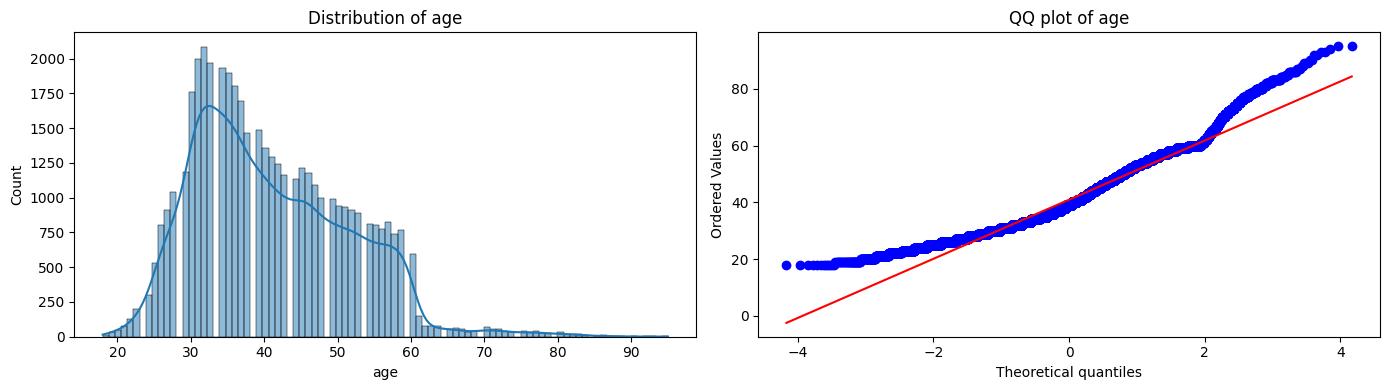

Skewness of balance: 8.360308326166326


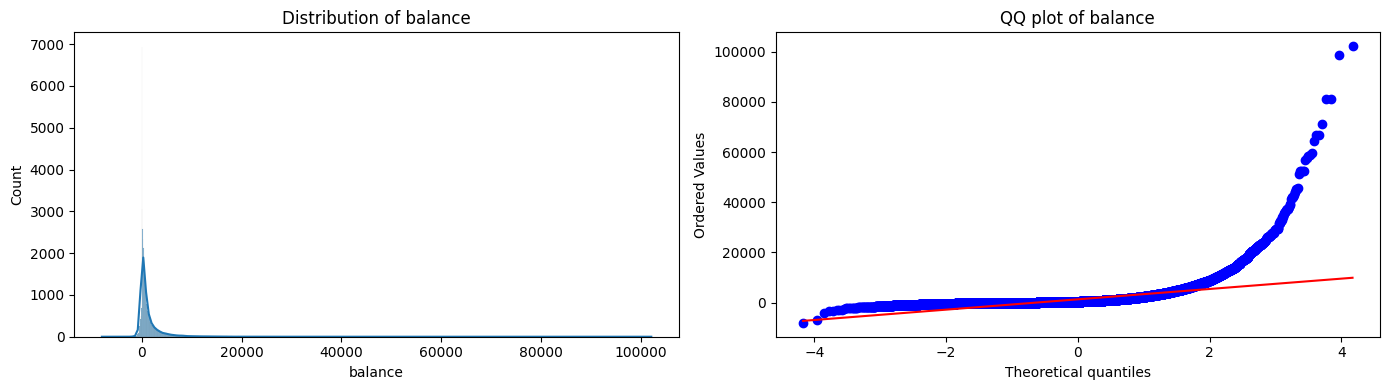

Skewness of day: 0.09307901402122411


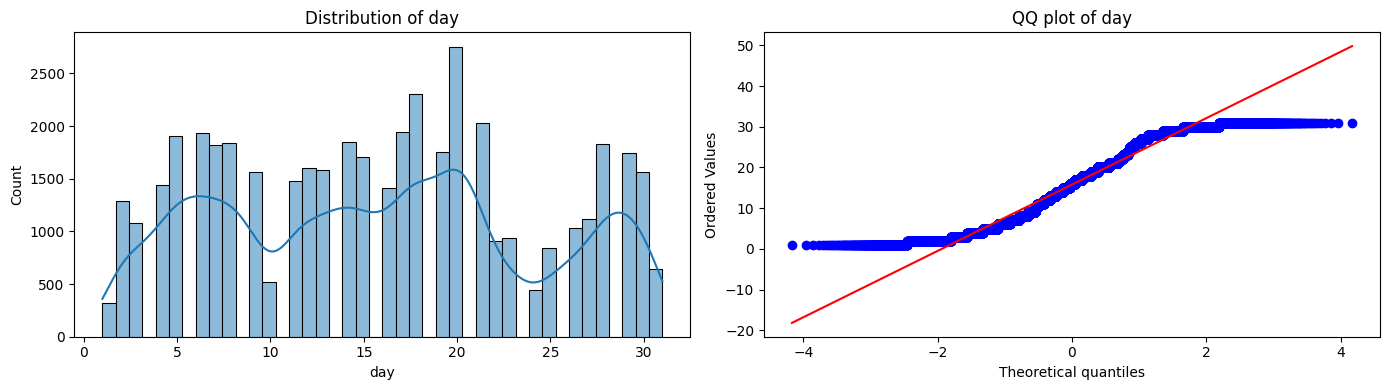

Skewness of duration: 3.144318099423456


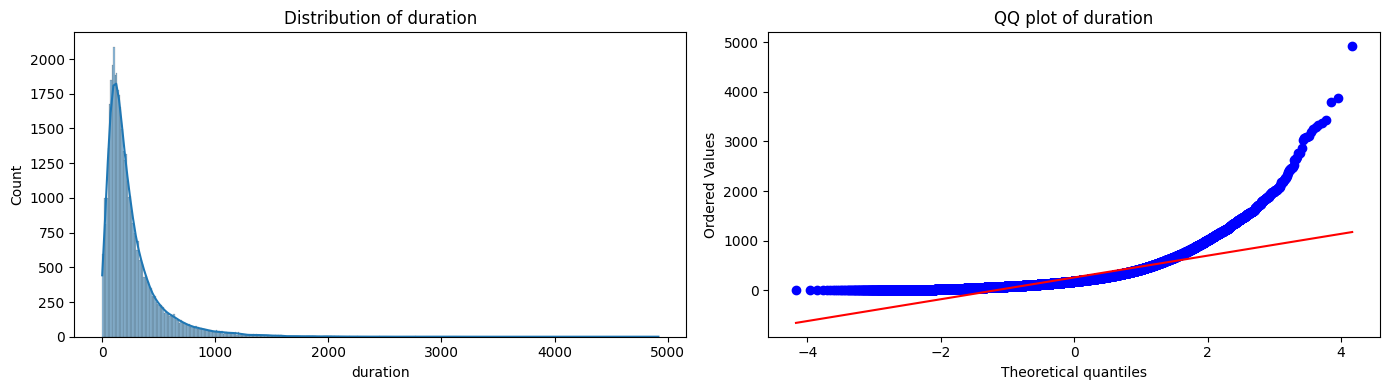

Skewness of campaign: 4.898650166179674


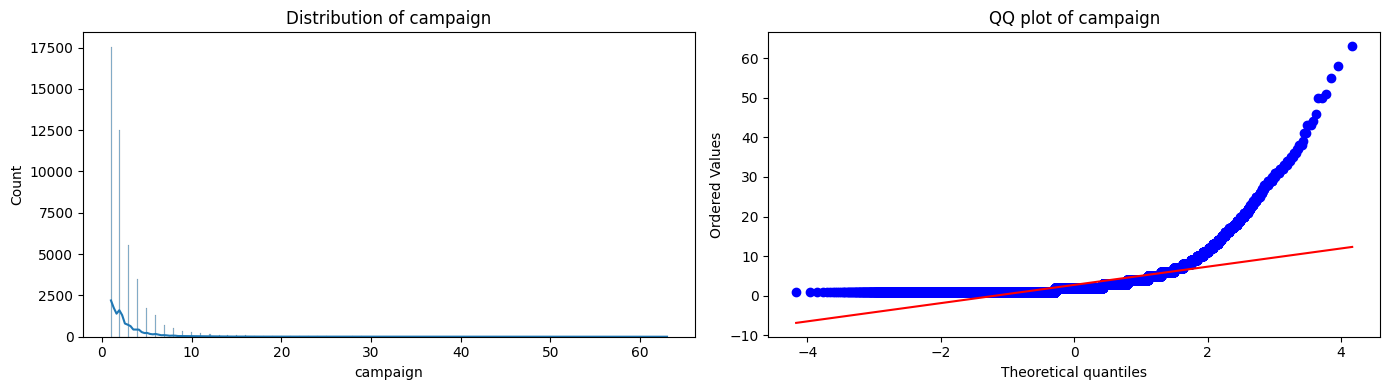

Skewness of pdays: 2.6157154736563477


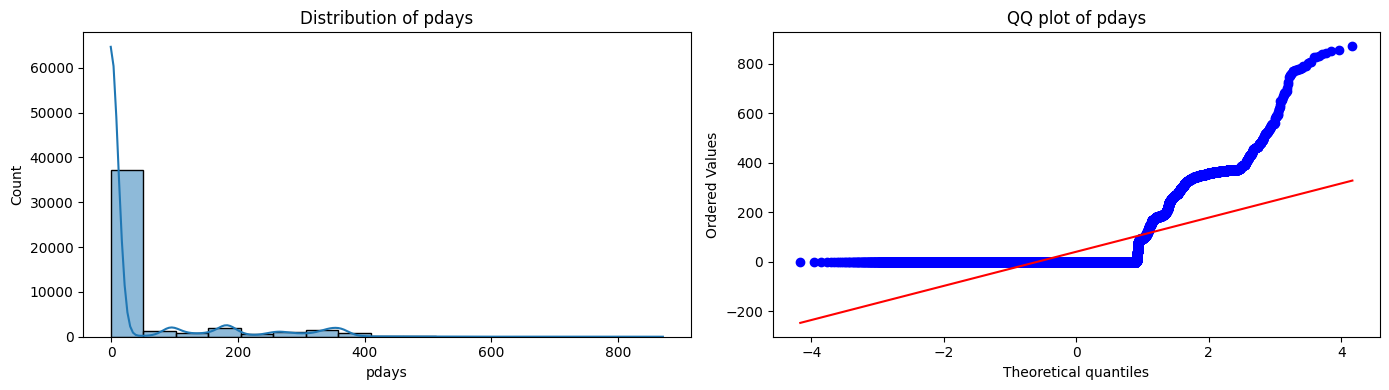

Skewness of previous: 41.84645447266292


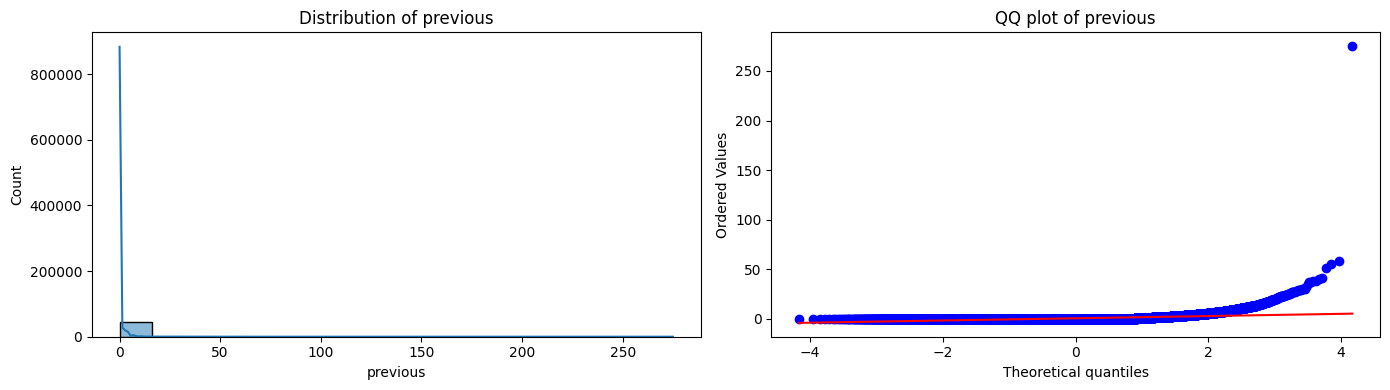

In [46]:
for col in num_col.columns:
    skewness = num_col[col].skew()
    print(f'Skewness of {col}: {skewness}')
    
    plt.figure(figsize=(14, 4))

    # Distribution plot
    plt.subplot(121)
    sns.histplot(num_col[col], kde=True)  # Changed to histplot
    plt.title(f'Distribution of {col}')

    # QQ plot
    plt.subplot(122)
    stats.probplot(num_col[col], dist='norm', plot=plt)
    plt.title(f'QQ plot of {col}')

    plt.tight_layout()
    plt.show()

### Outlier detection

### In age column

<Axes: ylabel='age'>

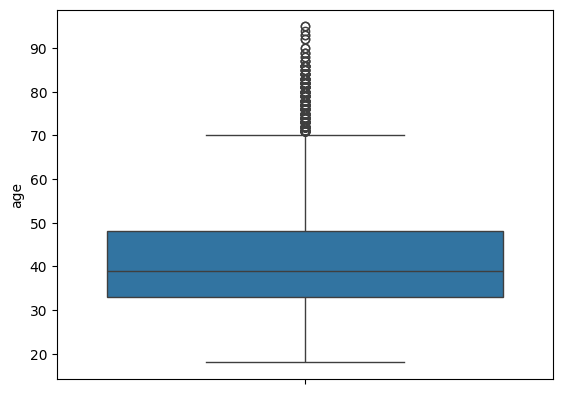

In [47]:
sns.boxplot(df['age'])

In [6]:
# finding the IQR
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['age'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['age'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

33.0
48.0
IQR is  15.0
upper limit  70.5
lower limit  10.5
length of outliers on upper bound  487
length of outliers on lower bound  0


In [7]:
new_df = df[df['age'] < upper_limit]
print(new_df.shape)

(44724, 17)


<Axes: ylabel='age'>

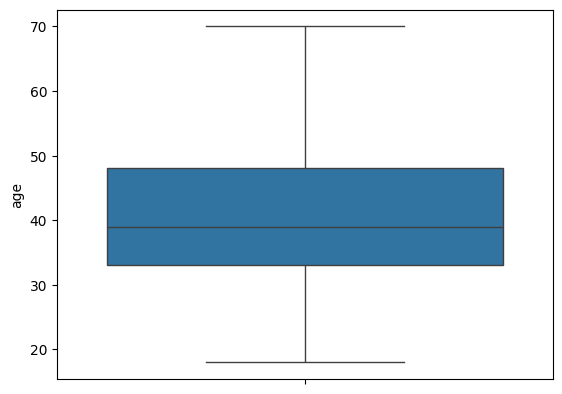

In [8]:
sns.boxplot(new_df['age'])

### On the balance column

<Axes: ylabel='balance'>

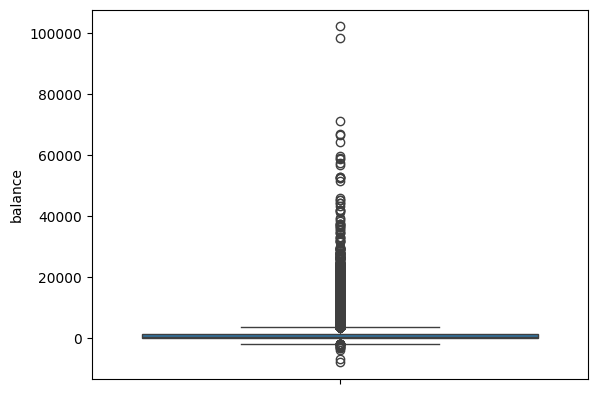

In [9]:
sns.boxplot(new_df['balance'])

In [10]:
# finding the IQR
q1 = new_df['balance'].quantile(0.25)
q3 = new_df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

71.0
1408.0
IQR is  1337.0
upper limit  3413.5
lower limit  -1934.5
length of outliers on upper bound  4677
length of outliers on lower bound  19


In [11]:
df = new_df[(new_df['balance'] > lower_limit) & (new_df['balance'] < upper_limit)]
print(df.shape)

(40028, 17)


<Axes: ylabel='balance'>

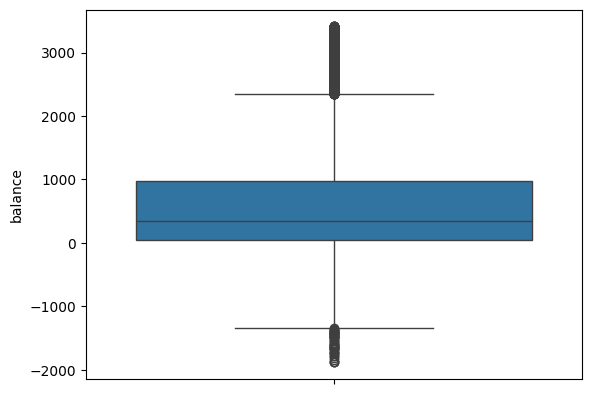

In [12]:
sns.boxplot(df['balance'])

In [14]:
# finding the IQR
q1 = df['balance'].quantile(0.25)
q3 = df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

44.0
967.0
IQR is  923.0
upper limit  2351.5
lower limit  -1340.5
length of outliers on upper bound  2464
length of outliers on lower bound  51


In [15]:
new_df = df[(df['balance'] > lower_limit) & (df['balance'] < upper_limit)]
print(new_df.shape)

(37513, 17)


<Axes: ylabel='balance'>

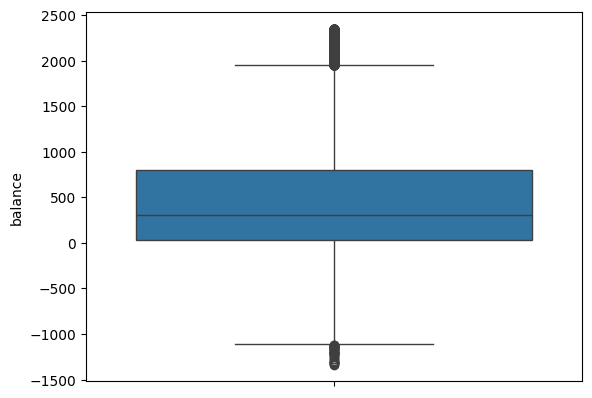

In [16]:
sns.boxplot(new_df['balance'])

In [17]:
# finding the IQR
q1 = new_df['balance'].quantile(0.25)
q3 = new_df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

31.0
797.0
IQR is  766.0
upper limit  1946.0
lower limit  -1118.0
length of outliers on upper bound  1396
length of outliers on lower bound  38


In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = new_df[(new_df['balance'] > lower_limit) & (new_df['balance'] < upper_limit)]
print(df.shape)

(36076, 17)


<Axes: ylabel='balance'>

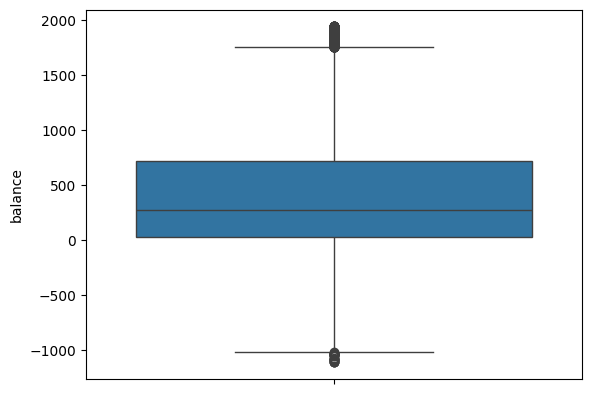

In [20]:
sns.boxplot(df['balance'])

In [21]:
# finding the IQR
q1 = df['balance'].quantile(0.25)
q3 = df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

24.0
716.0
IQR is  692.0
upper limit  1754.0
lower limit  -1014.0
length of outliers on upper bound  814
length of outliers on lower bound  28


In [22]:
new_df = df[(df['balance'] > lower_limit) & (df['balance'] < upper_limit)]
print(new_df.shape)

(35233, 17)


<Axes: ylabel='balance'>

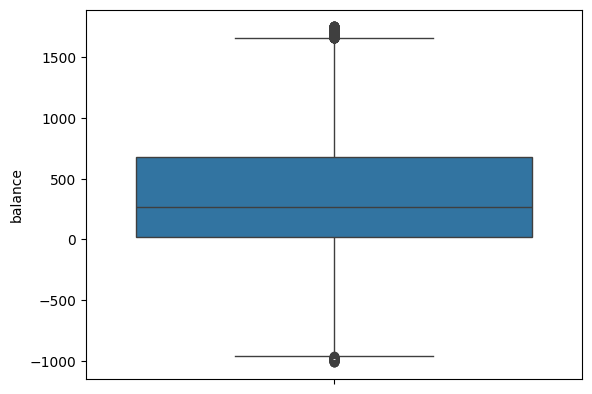

In [23]:
sns.boxplot(new_df['balance'])

In [24]:
# finding the IQR
q1 = new_df['balance'].quantile(0.25)
q3 = new_df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

21.0
676.0
IQR is  655.0
upper limit  1658.5
lower limit  -961.5
length of outliers on upper bound  440
length of outliers on lower bound  31


In [25]:
df = new_df[(new_df['balance'] > lower_limit) & (new_df['balance'] < upper_limit)]
print(df.shape)

(34762, 17)


<Axes: ylabel='balance'>

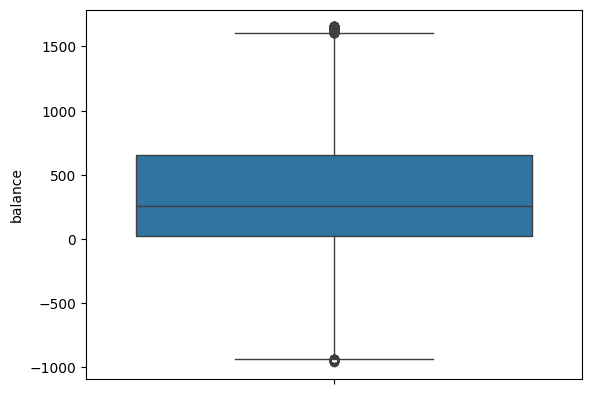

In [26]:
sns.boxplot(df['balance'])

In [28]:
# finding the IQR
q1 = df['balance'].quantile(0.25)
q3 = df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

20.0
655.0
IQR is  635.0
upper limit  1607.5
lower limit  -932.5
length of outliers on upper bound  266
length of outliers on lower bound  15


In [29]:
new_df = df[(df['balance'] > lower_limit) & (df['balance'] < upper_limit)]
print(new_df.shape)

(34481, 17)


<Axes: ylabel='balance'>

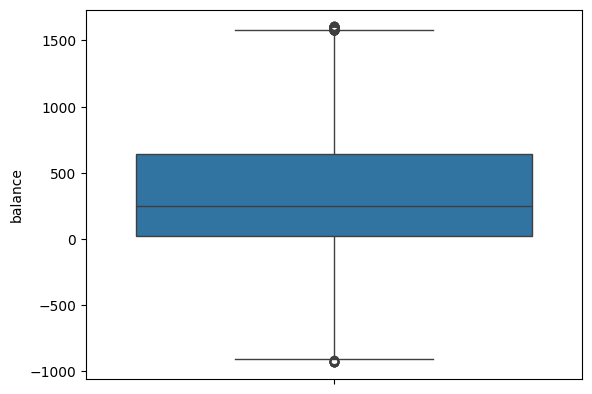

In [30]:
sns.boxplot(new_df['balance'])

In [31]:
# finding the IQR
q1 = new_df['balance'].quantile(0.25)
q3 = new_df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

19.0
642.0
IQR is  623.0
upper limit  1576.5
lower limit  -915.5
length of outliers on upper bound  166
length of outliers on lower bound  8


In [32]:
df = new_df[(new_df['balance'] > lower_limit) & (new_df['balance'] < upper_limit)]
print(df.shape)

(34307, 17)


<Axes: ylabel='balance'>

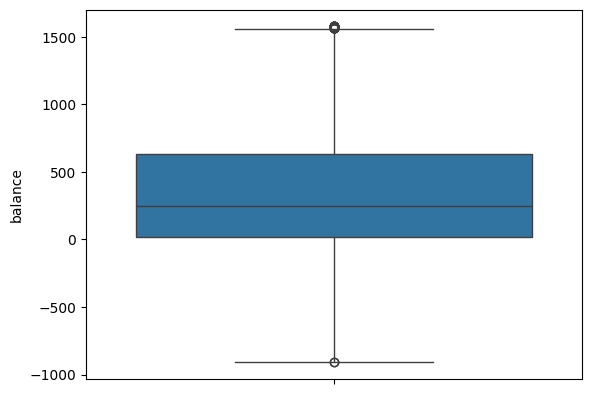

In [33]:
sns.boxplot(df['balance'])

In [34]:
# finding the IQR
q1 = df['balance'].quantile(0.25)
q3 = df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

18.0
635.0
IQR is  617.0
upper limit  1560.5
lower limit  -907.5
length of outliers on upper bound  78
length of outliers on lower bound  2


In [36]:
new_df = df[(df['balance'] > lower_limit) & (df['balance'] < upper_limit)]
print(new_df.shape)

(34227, 17)


<Axes: ylabel='balance'>

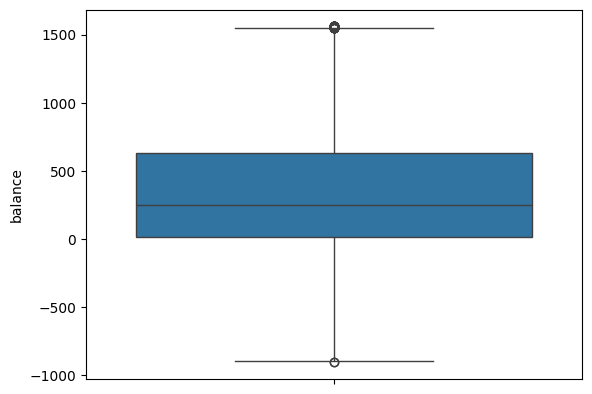

In [37]:
sns.boxplot(new_df['balance'])

In [38]:
# finding the IQR
q1 = new_df['balance'].quantile(0.25)
q3 = new_df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

18.0
630.5
IQR is  612.5
upper limit  1549.25
lower limit  -900.75
length of outliers on upper bound  61
length of outliers on lower bound  2


In [40]:
new_df = new_df[(new_df['balance'] > lower_limit) & (new_df['balance'] < upper_limit)]
print(new_df.shape)

(34164, 17)


<Axes: ylabel='balance'>

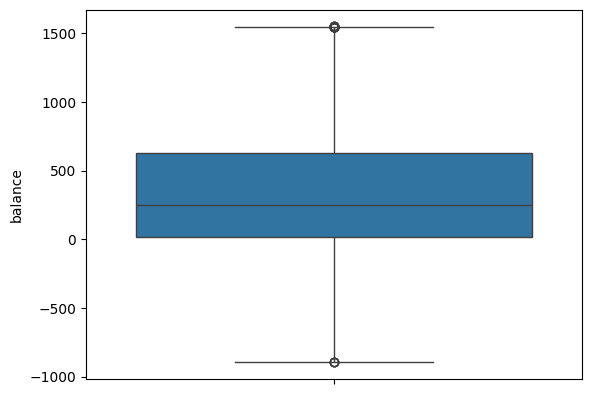

In [41]:
sns.boxplot(new_df['balance'])

In [42]:
# finding the IQR
q1 = new_df['balance'].quantile(0.25)
q3 = new_df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

18.0
628.0
IQR is  610.0
upper limit  1543.0
lower limit  -897.0
length of outliers on upper bound  34
length of outliers on lower bound  4


In [43]:
df = new_df[(new_df['balance'] > lower_limit) & (new_df['balance'] < upper_limit)]
print(df.shape)

(34121, 17)


<Axes: ylabel='balance'>

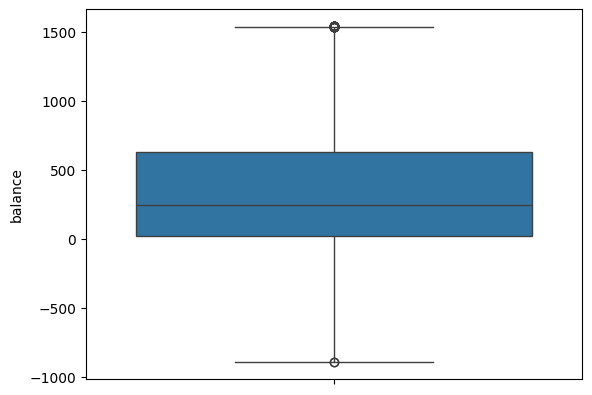

In [44]:
sns.boxplot(df['balance'])

In [45]:
# finding the IQR
q1 = df['balance'].quantile(0.25)
q3 = df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

18.0
626.0
IQR is  608.0
upper limit  1538.0
lower limit  -894.0
length of outliers on upper bound  24
length of outliers on lower bound  2


In [46]:
new_df = df[(df['balance'] > lower_limit) & (df['balance'] < upper_limit)]
print(new_df.shape)

(34091, 17)


<Axes: ylabel='balance'>

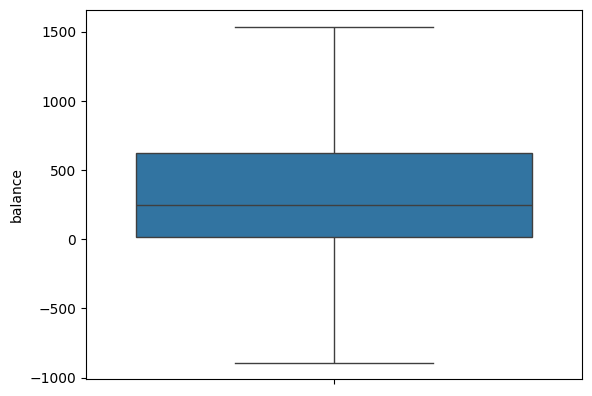

In [47]:
sns.boxplot(new_df['balance'])

### On the duration column

<Axes: ylabel='duration'>

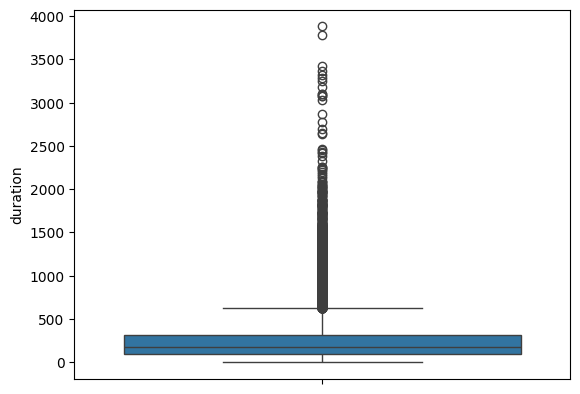

In [50]:
sns.boxplot(new_df['duration'])

In [52]:
# finding the IQR
q1 = new_df['duration'].quantile(0.25)
q3 = new_df['duration'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['duration'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['duration'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

101.0
312.0
IQR is  211.0
upper limit  628.5
lower limit  -215.5
length of outliers on upper bound  2452
length of outliers on lower bound  0


In [53]:
df = new_df[new_df['duration'] < upper_limit]
print(df.shape)

(31639, 17)


<Axes: ylabel='duration'>

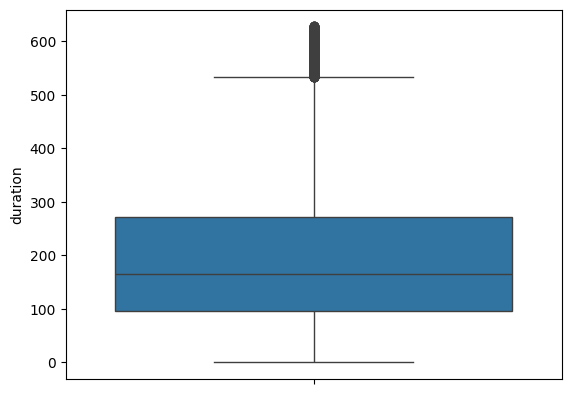

In [54]:
sns.boxplot(df['duration'])

In [55]:
# finding the IQR
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['duration'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['duration'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

96.0
271.0
IQR is  175.0
upper limit  533.5
lower limit  -166.5
length of outliers on upper bound  975
length of outliers on lower bound  0


In [56]:
new_df = df[df['duration'] < upper_limit]
print(new_df.shape)

(30664, 17)


<Axes: ylabel='duration'>

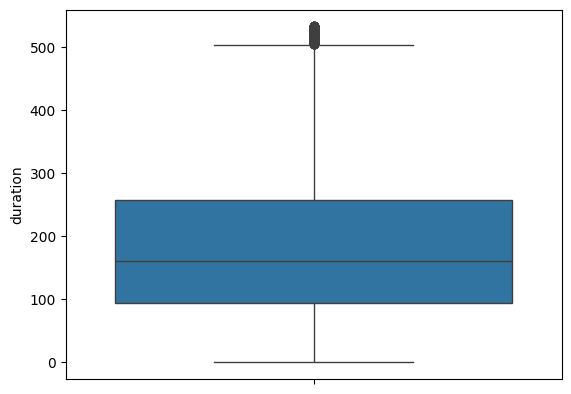

In [57]:
sns.boxplot(new_df['duration'])

In [58]:
# finding the IQR
q1 = new_df['duration'].quantile(0.25)
q3 = new_df['duration'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['duration'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['duration'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

94.0
258.0
IQR is  164.0
upper limit  504.0
lower limit  -152.0
length of outliers on upper bound  391
length of outliers on lower bound  0


In [59]:
df = new_df[new_df['duration'] < upper_limit]
print(df.shape)

(30250, 17)


<Axes: ylabel='duration'>

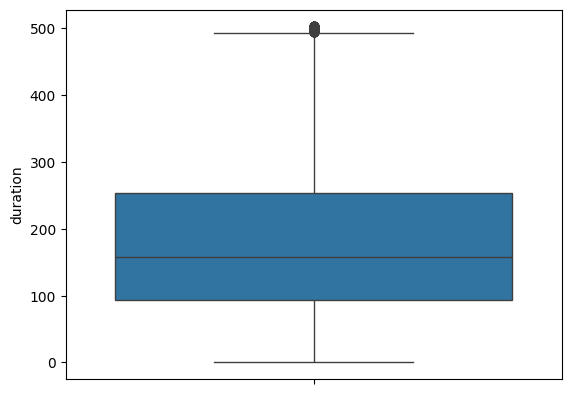

In [60]:
sns.boxplot(df['duration'])

In [61]:
# finding the IQR
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['duration'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['duration'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

93.0
253.0
IQR is  160.0
upper limit  493.0
lower limit  -147.0
length of outliers on upper bound  131
length of outliers on lower bound  0


In [62]:
new_df = df[df['duration'] < upper_limit]
print(new_df.shape)

(30104, 17)


<Axes: ylabel='duration'>

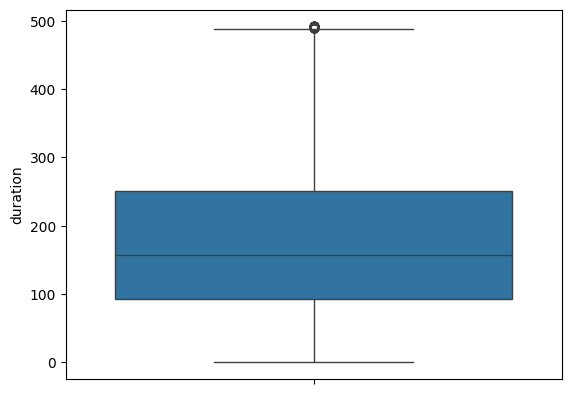

In [63]:
sns.boxplot(new_df['duration'])

In [64]:
# finding the IQR
q1 = new_df['duration'].quantile(0.25)
q3 = new_df['duration'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['duration'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['duration'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

93.0
251.0
IQR is  158.0
upper limit  488.0
lower limit  -144.0
length of outliers on upper bound  56
length of outliers on lower bound  0


In [65]:
df = new_df[new_df['duration'] < upper_limit]
print(df.shape)

(30038, 17)


<Axes: ylabel='duration'>

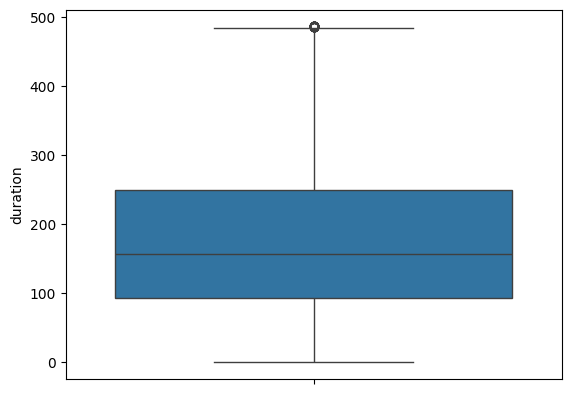

In [66]:
sns.boxplot(df['duration'])

In [67]:
# finding the IQR
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['duration'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['duration'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

93.0
250.0
IQR is  157.0
upper limit  485.5
lower limit  -142.5
length of outliers on upper bound  22
length of outliers on lower bound  0


In [68]:
new_df = df[df['duration'] < upper_limit]
print(new_df.shape)

(30016, 17)


<Axes: ylabel='duration'>

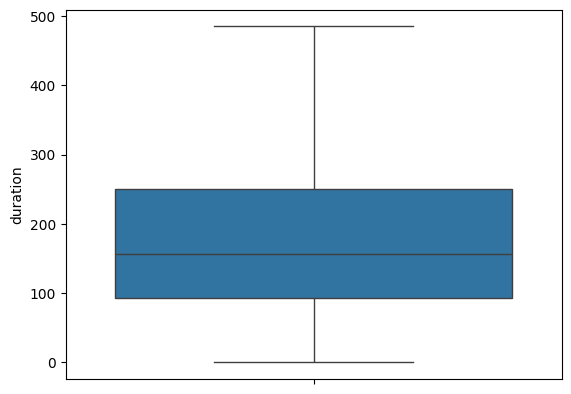

In [70]:
sns.boxplot(new_df['duration'])

### On the column pdays

<Axes: ylabel='pdays'>

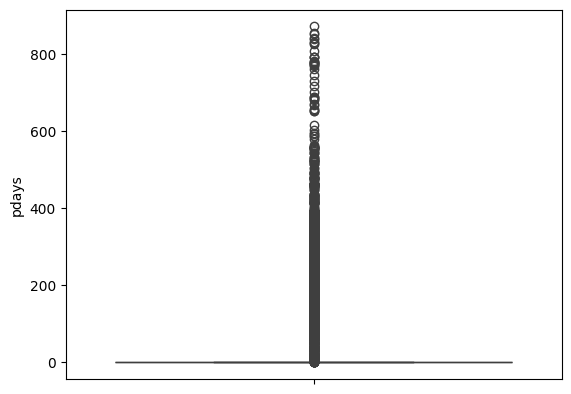

In [72]:
sns.boxplot(new_df['pdays'])

In [73]:
# finding the IQR
q1 = new_df['pdays'].quantile(0.25)
q3 = new_df['pdays'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['pdays'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['pdays'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

-1.0
-1.0
IQR is  0.0
upper limit  -1.0
lower limit  -1.0
length of outliers on upper bound  5199
length of outliers on lower bound  0


In [74]:
new_df['pdays'].describe()

count    30016.000000
mean        40.179038
std        102.425758
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

> We have a lot of outliers in this feature so to remove this is best for our model

In [75]:
new_df.drop(columns=['pdays'],inplace=True)

In [76]:
new_df.shape

(30016, 16)

### Now outliers dtection and removal on compaign

<Axes: ylabel='campaign'>

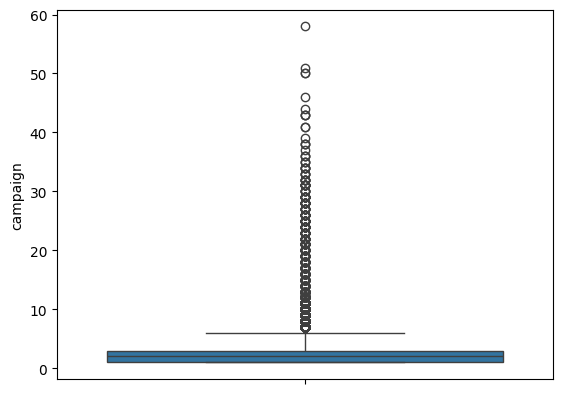

In [82]:
sns.boxplot(new_df['campaign'])

In [83]:
# finding the IQR
q1 = new_df['campaign'].quantile(0.25)
q3 = new_df['campaign'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['campaign'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['campaign'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1.0
3.0
IQR is  2.0
upper limit  6.0
lower limit  -2.0
length of outliers on upper bound  2165
length of outliers on lower bound  0


In [84]:
df = new_df[new_df['campaign'] < upper_limit]
print(df.shape)

(26966, 16)


<Axes: ylabel='campaign'>

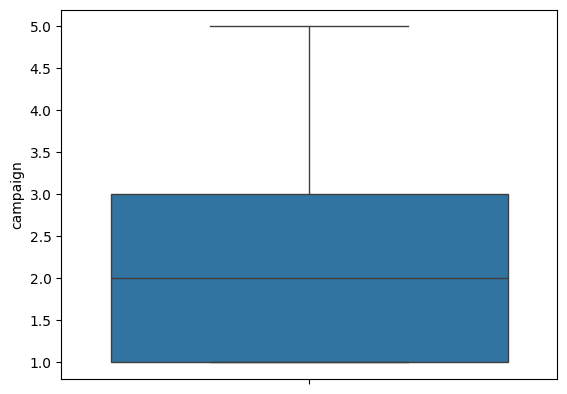

In [85]:
sns.boxplot(df['campaign'])

### Outliers detection and removing on column previous

<Axes: ylabel='previous'>

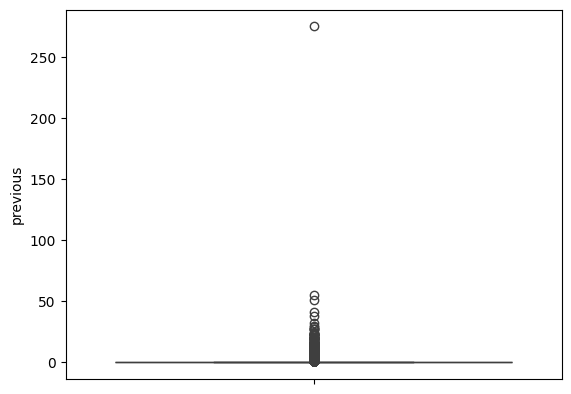

In [88]:
sns.boxplot(df['previous'])

In [92]:
# finding the IQR
q1 = df['previous'].quantile(0.25)
q3 = df['previous'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['previous'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['previous'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

0.0
0.0
IQR is  0.0
upper limit  0.0
lower limit  0.0
length of outliers on upper bound  4935
length of outliers on lower bound  0


In [93]:
df.previous.describe()

count    26966.000000
mean         0.555737
std          2.447897
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

> We should remove this column in my point of view because its 25% is 0.000 as same as to 75%. Such columns will create probelm during model building

In [94]:
df.drop(columns=['previous'],inplace=True)

<Axes: >

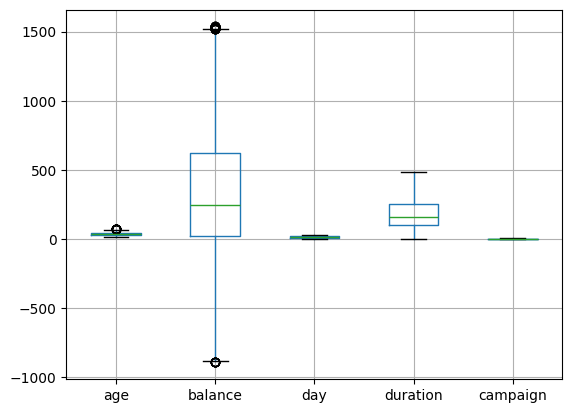

In [95]:
df.boxplot()

### Now again applying this method on age 

<Axes: ylabel='age'>

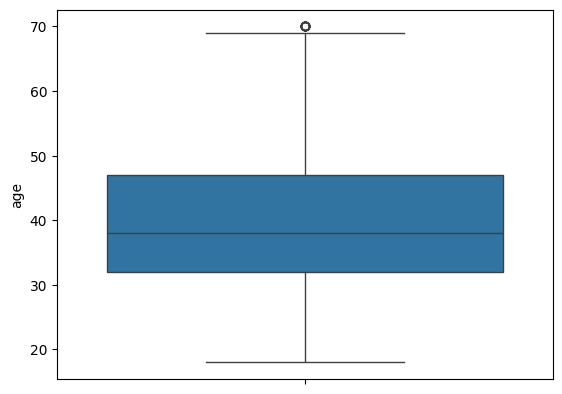

In [96]:
sns.boxplot(df['age'])

In [97]:
# finding the IQR
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['age'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['age'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

32.0
47.0
IQR is  15.0
upper limit  69.5
lower limit  9.5
length of outliers on upper bound  21
length of outliers on lower bound  0


In [99]:
new_df = df.copy()
new_df['age'] = np.where(
    new_df['age'] > upper_limit,
    upper_limit,

np.where(
    new_df['age'] < lower_limit,
    lower_limit,
    new_df['age']
)
)
new_df.shape

(26966, 15)

<Axes: ylabel='age'>

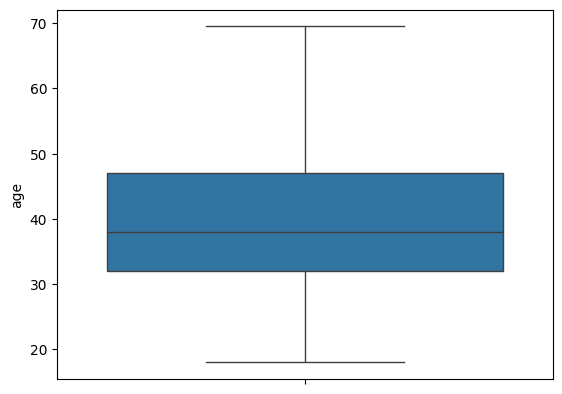

In [100]:
sns.boxplot(new_df['age'])

### Now on the balance column

<Axes: ylabel='balance'>

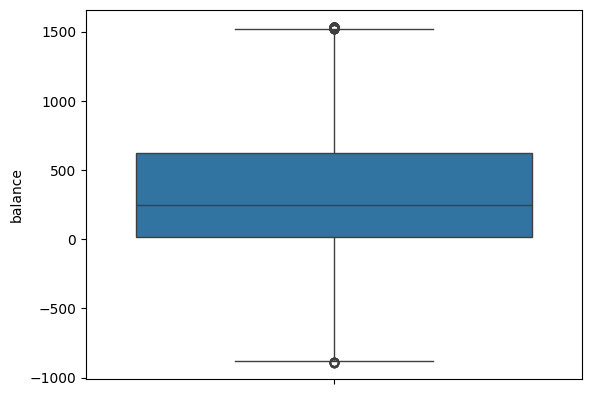

In [102]:
sns.boxplot(new_df['balance'])

In [103]:
# finding the IQR
q1 = new_df['balance'].quantile(0.25)
q3 = new_df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

19.0
620.0
IQR is  601.0
upper limit  1521.5
lower limit  -882.5
length of outliers on upper bound  98
length of outliers on lower bound  8


In [104]:
df = new_df[(new_df['balance'] > lower_limit) & (new_df['balance'] < upper_limit)]
print(df.shape)

(26860, 15)


<Axes: ylabel='balance'>

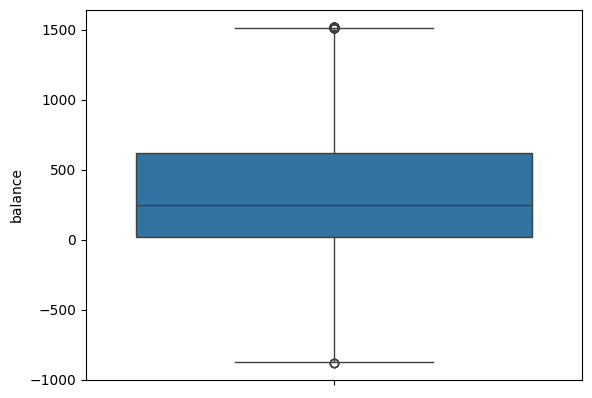

In [106]:
sns.boxplot(df['balance'])

In [107]:
# finding the IQR
q1 = df['balance'].quantile(0.25)
q3 = df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

19.0
615.0
IQR is  596.0
upper limit  1509.0
lower limit  -875.0
length of outliers on upper bound  51
length of outliers on lower bound  3


In [108]:
new_df = df[(df['balance'] > lower_limit) & (df['balance'] < upper_limit)]
print(new_df.shape)

(26803, 15)


<Axes: ylabel='balance'>

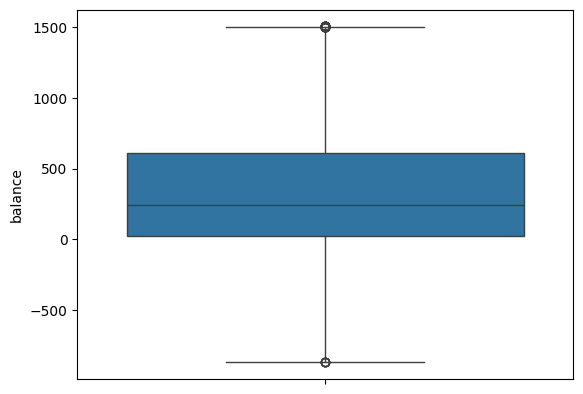

In [109]:
sns.boxplot(new_df['balance'])

In [110]:
# finding the IQR
q1 = new_df['balance'].quantile(0.25)
q3 = new_df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

19.0
612.0
IQR is  593.0
upper limit  1501.5
lower limit  -870.5
length of outliers on upper bound  35
length of outliers on lower bound  5


In [111]:
df = new_df[(new_df['balance'] > lower_limit) & (new_df['balance'] < upper_limit)]
print(df.shape)

(26763, 15)


<Axes: ylabel='balance'>

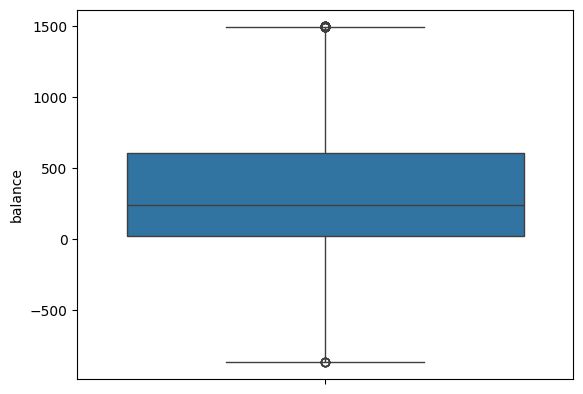

In [112]:
sns.boxplot(df['balance'])

In [113]:
# finding the IQR
q1 = df['balance'].quantile(0.25)
q3 = df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

19.0
610.0
IQR is  591.0
upper limit  1496.5
lower limit  -867.5
length of outliers on upper bound  22
length of outliers on lower bound  5


In [114]:
new_df = df.copy()
new_df['balance'] = np.where(
    new_df['age'] > upper_limit,
    upper_limit,

np.where(
    new_df['balance'] < lower_limit,
    lower_limit,
    new_df['balance']
)
)
new_df.shape

(26763, 15)

<Axes: ylabel='balance'>

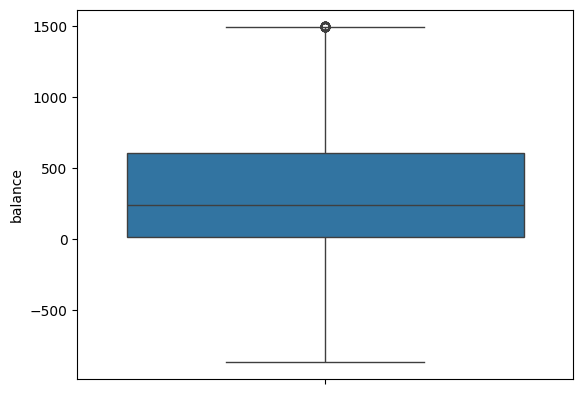

In [115]:
sns.boxplot(new_df['balance'])

In [117]:
# finding the IQR
q1 = new_df['balance'].quantile(0.25)
q3 = new_df['balance'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['balance'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['balance'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

19.0
610.0
IQR is  591.0
upper limit  1496.5
lower limit  -867.5
length of outliers on upper bound  22
length of outliers on lower bound  0


In [120]:
df = new_df.copy()
df['balance'] = np.where(
    df['balance'] > upper_limit,
    upper_limit,

np.where(
    df['balance'] < lower_limit,
    lower_limit,
    df['balance']
)
)
df.shape

(26763, 15)

<Axes: ylabel='balance'>

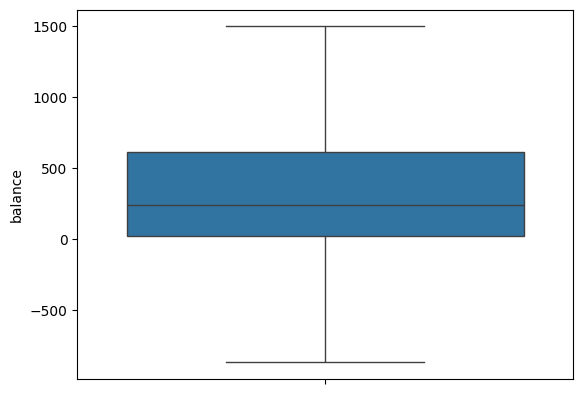

In [121]:
sns.boxplot(df['balance'])

<Axes: >

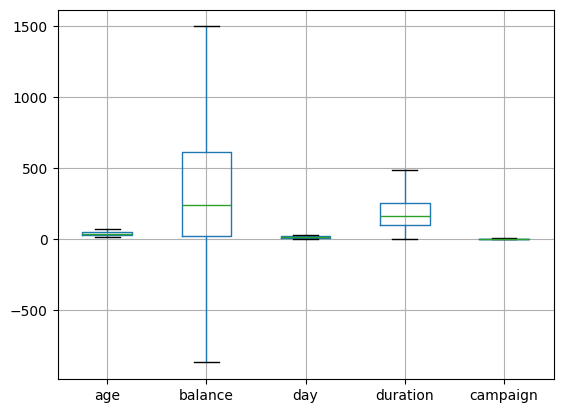

In [122]:
df.boxplot()

### Main file for task is saved here

In [123]:
df.to_csv("Classification_tak.csv")

In [36]:
df = pd.read_csv("Classification_tak.csv")

In [38]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,unknown,no
1,2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,unknown,no
2,4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,unknown,no
3,5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,unknown,no
4,6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,unknown,no


### Plotting for categorical features

In [37]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'poutcome', 'y'],
      dtype='object')

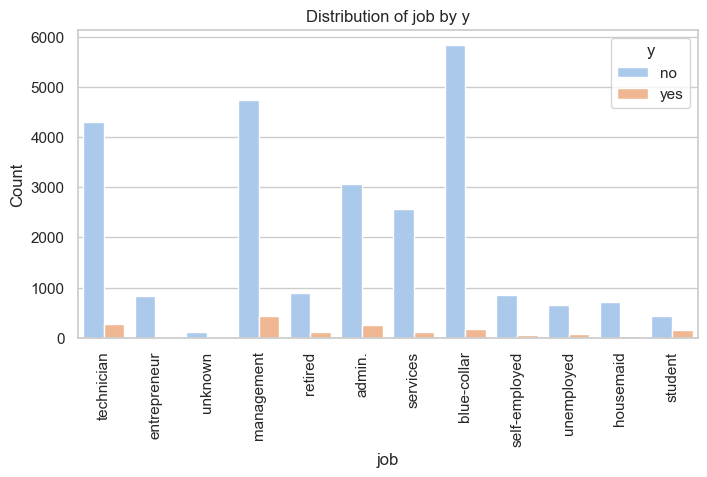

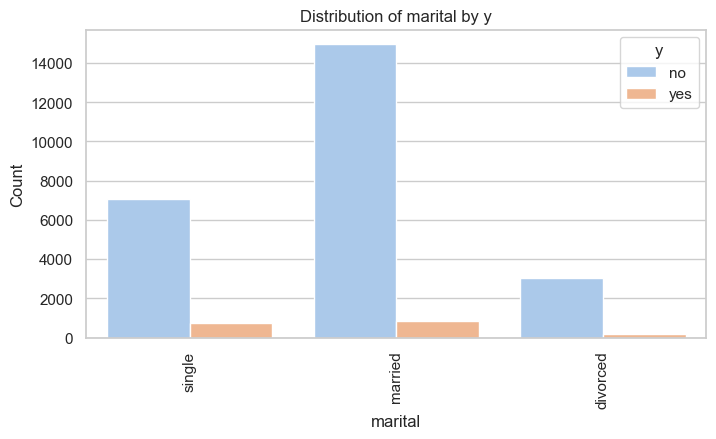

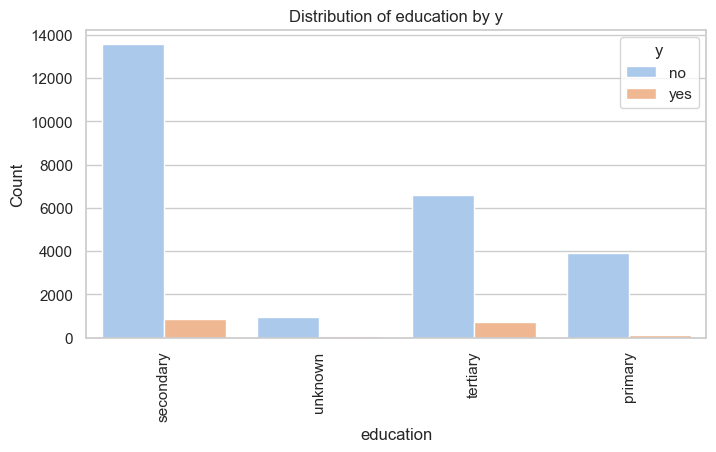

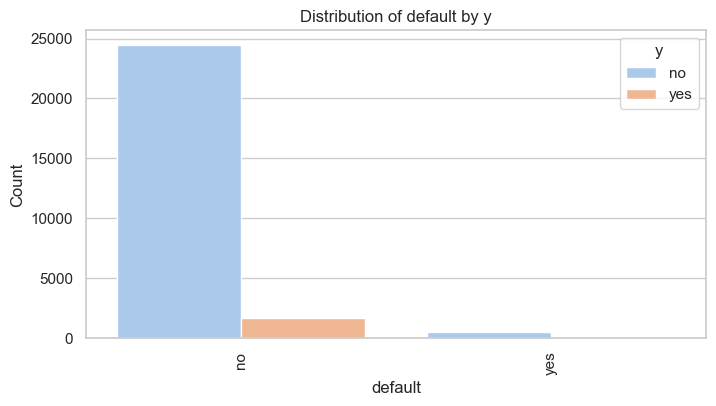

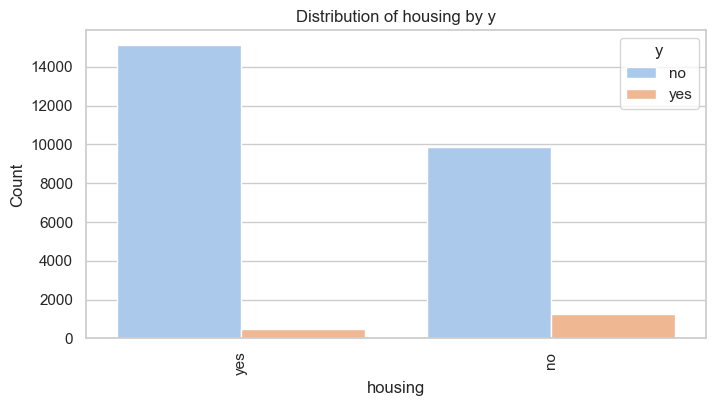

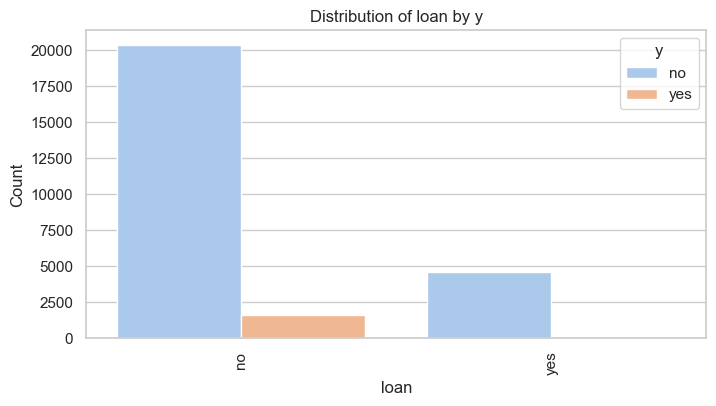

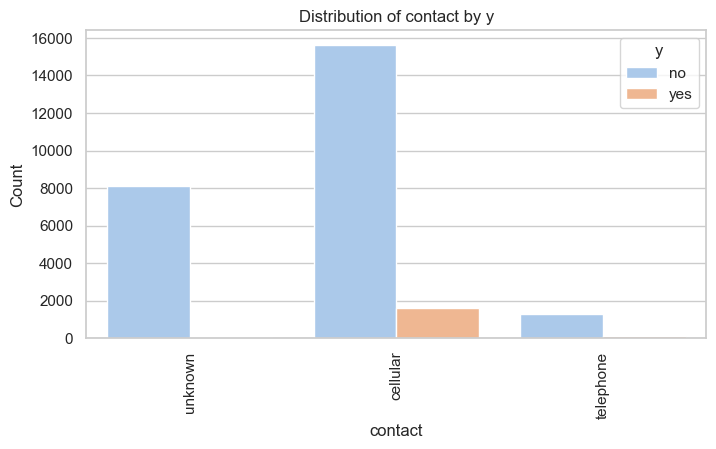

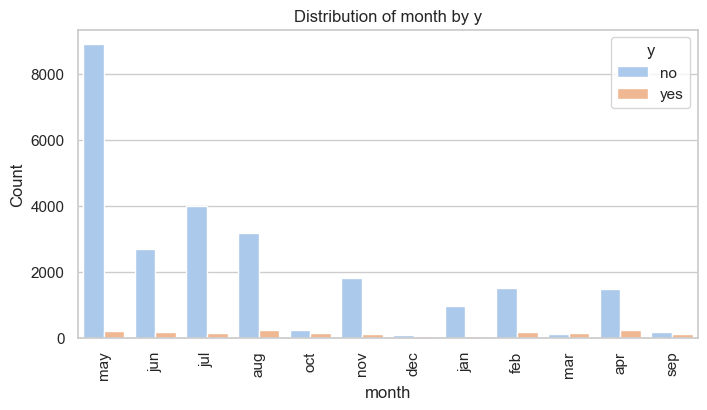

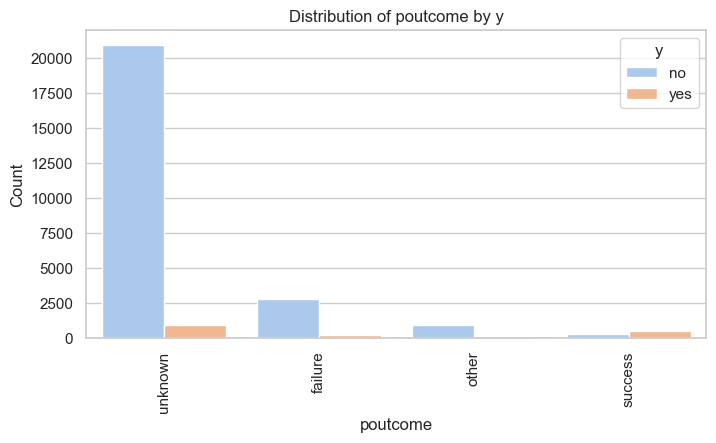

In [42]:
sns.set(style="whitegrid")

# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default',
'housing', 'loan', 'contact','month','poutcome']
for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='y', palette='pastel')
    plt.title(f'Distribution of {col} by y')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='y')
    plt.xticks(rotation=90)
    plt.show()

### Applying encoding methods

In [129]:
df.job.value_counts(True)

job
blue-collar      0.224601
management       0.193738
technician       0.171319
admin.           0.124351
services         0.099877
retired          0.037365
self-employed    0.034301
entrepreneur     0.032433
housemaid        0.027725
unemployed       0.027687
student          0.021560
unknown          0.005044
Name: proportion, dtype: float64

In [14]:
df['job'] = df['job'].replace(['services','retired','self-employed','entrepreneur','housemaid','unemployed','student','unknown'],'minorities')

In [15]:
df.job.value_counts(True)

job
minorities     0.285992
blue-collar    0.224601
management     0.193738
technician     0.171319
admin.         0.124351
Name: proportion, dtype: float64

In [138]:
df.marital.value_counts(True)

marital
married     0.589508
single      0.291671
divorced    0.118821
Name: proportion, dtype: float64

In [139]:
df.education.value_counts(True)

education
secondary    0.538430
tertiary     0.273213
primary      0.149983
unknown      0.038374
Name: proportion, dtype: float64

In [140]:
df.default.value_counts(True)

default
no     0.978403
yes    0.021597
Name: proportion, dtype: float64

In [141]:
df.housing.value_counts(True)

housing
yes    0.583866
no     0.416134
Name: proportion, dtype: float64

In [142]:
df.loan.value_counts(True)

loan
no     0.821694
yes    0.178306
Name: proportion, dtype: float64

In [143]:
df.contact.value_counts(True)

contact
cellular     0.643314
unknown      0.304749
telephone    0.051937
Name: proportion, dtype: float64

In [144]:
df.month.value_counts(True)

month
may    0.339536
jul    0.154355
aug    0.126780
jun    0.107126
nov    0.071741
apr    0.063819
feb    0.062101
jan    0.037402
oct    0.013377
sep    0.010798
mar    0.008930
dec    0.004035
Name: proportion, dtype: float64

In [16]:
df['month'] = df['month'].replace(['nov','apr','feb','jan'],'nafj')
df['month'] = df['month'].replace(['oct','sep','mar','dec'],'osmd')

In [7]:
df.month.value_counts(True)

month
may     0.339536
nafj    0.235063
jul     0.154355
aug     0.126780
jun     0.107126
osmd    0.037141
Name: proportion, dtype: float64

In [147]:
df.poutcome.value_counts(True)

poutcome
unknown    0.817883
failure    0.114113
other      0.040167
success    0.027837
Name: proportion, dtype: float64

In [17]:
df['poutcome'] = df['poutcome'].replace(['other','success'],'others')

In [18]:
df.poutcome.value_counts(True)

poutcome
unknown    0.817883
failure    0.114113
others     0.068004
Name: proportion, dtype: float64

In [150]:
df.y.value_counts(True)

y
no     0.934948
yes    0.065052
Name: proportion, dtype: float64

## By observation according to `y` column our data is imbalnce

### Final step to impliment encodin methods

In [19]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Columns to one-hot encode
columns_to_encode = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Apply OneHotEncoder using ColumnTransformer
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), columns_to_encode)
], remainder='passthrough')

# Fit and transform the dataset (excluding the 'education' and 'y' columns for now)
encoded_array = trf1.fit_transform(df.drop(columns=['education', 'y']))

# Apply LabelEncoder separately on the 'y' and 'education' columns
le_y = LabelEncoder()
df['y'] = le_y.fit_transform(df['y'])

le_education = LabelEncoder()
df['education'] = le_education.fit_transform(df['education'])

# Convert the transformed array into a DataFrame (convert sparse matrix to dense if necessary)
encoded_df = pd.DataFrame(encoded_array, columns=trf1.get_feature_names_out())

# Add the LabelEncoded 'y' and 'education' columns back to the DataFrame
encoded_df['y'] = df['y']
encoded_df['education'] = df['education']




# To view the label encoding mapping for 'y'
y_mapping = dict(zip(le_y.classes_, le_y.transform(le_y.classes_)))
print("LabelEncoder mapping for 'y':", y_mapping)

# To view the label encoding mapping for 'education'
education_mapping = dict(zip(le_education.classes_, le_education.transform(le_education.classes_)))
print("LabelEncoder mapping for 'education':", education_mapping)


LabelEncoder mapping for 'y': {'no': np.int64(0), 'yes': np.int64(1)}
LabelEncoder mapping for 'education': {'primary': np.int64(0), 'secondary': np.int64(1), 'tertiary': np.int64(2), 'unknown': np.int64(3)}


In [21]:
pd.set_option('display.max_columns',None)

In [22]:
encoded_df.head()

,ohe__job_admin.,ohe__job_blue-collar,ohe__job_management,ohe__job_minorities,ohe__job_technician,ohe__marital_divorced,ohe__marital_married,ohe__marital_single,ohe__default_no,ohe__default_yes,ohe__housing_no,ohe__housing_yes,ohe__loan_no,ohe__loan_yes,ohe__contact_cellular,ohe__contact_telephone,ohe__contact_unknown,ohe__month_aug,ohe__month_jul,ohe__month_jun,ohe__month_may,ohe__month_nafj,ohe__month_osmd,ohe__poutcome_failure,ohe__poutcome_others,ohe__poutcome_unknown,remainder__age,remainder__balance,remainder__day,remainder__duration,remainder__campaign,y,education
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,44.0,29.0,5.0,151.0,1.0,0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33.0,2.0,5.0,76.0,1.0,0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33.0,1.0,5.0,198.0,1.0,0,3
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,35.0,231.0,5.0,139.0,1.0,0,2
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,28.0,447.0,5.0,217.0,1.0,0,2


### Rename the colulmns in suitable form

In [23]:
# Replace 'remainder__', 'ohe__', and 'ore__' prefixes with an empty string
encoded_df.columns = encoded_df.columns.str.replace('remainder__', '', regex=False)
encoded_df.columns = encoded_df.columns.str.replace('ohe__', '', regex=False)


In [24]:
encoded_df.head()

,job_admin.,job_blue-collar,job_management,job_minorities,job_technician,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_aug,month_jul,month_jun,month_may,month_nafj,month_osmd,poutcome_failure,poutcome_others,poutcome_unknown,age,balance,day,duration,campaign,y,education
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,44.0,29.0,5.0,151.0,1.0,0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33.0,2.0,5.0,76.0,1.0,0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33.0,1.0,5.0,198.0,1.0,0,3
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,35.0,231.0,5.0,139.0,1.0,0,2
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,28.0,447.0,5.0,217.0,1.0,0,2


### Main file

In [1]:
import pandas as pd
import numpy as np

In [25]:
encoded_df.to_csv('Final file.csv')

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Final file.csv')

In [4]:
df.head()

,Unnamed: 0,job_admin.,job_blue-collar,job_management,job_minorities,job_technician,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_aug,month_jul,month_jun,month_may,month_nafj,month_osmd,poutcome_failure,poutcome_others,poutcome_unknown,age,balance,day,duration,campaign,y,education
0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,44.0,29.0,5.0,151.0,1.0,0,1
1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33.0,2.0,5.0,76.0,1.0,0,1
2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33.0,1.0,5.0,198.0,1.0,0,3
3,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,35.0,231.0,5.0,139.0,1.0,0,2
4,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,28.0,447.0,5.0,217.0,1.0,0,2


In [5]:
df.shape

(26763, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26763 entries, 0 to 26762
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26763 non-null  int64  
 1   job_admin.         26763 non-null  float64
 2   job_blue-collar    26763 non-null  float64
 3   job_management     26763 non-null  float64
 4   job_minorities     26763 non-null  float64
 5   job_technician     26763 non-null  float64
 6   marital_divorced   26763 non-null  float64
 7   marital_married    26763 non-null  float64
 8   marital_single     26763 non-null  float64
 9   default_no         26763 non-null  float64
 10  default_yes        26763 non-null  float64
 11  housing_no         26763 non-null  float64
 12  housing_yes        26763 non-null  float64
 13  loan_no            26763 non-null  float64
 14  loan_yes           26763 non-null  float64
 15  contact_cellular   26763 non-null  float64
 16  contact_telephone  267

### Heatmap for correlation

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
import plotly.express as px

In [47]:
import pandas as pd
import plotly.express as px

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Plotly Express
fig = px.imshow(corr_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                color_continuous_scale=px.colors.diverging.Tealrose,
                zmin=-1, zmax=1,
                title="Correlation Matrix of Numerical Features")

# Update layout for better appearance
fig.update_layout(
    title_font=dict(size=18, family='Arial', color='darkblue'),
    xaxis_title="",
    yaxis_title="",
    xaxis=dict(tickangle=90, tickmode='array', tickvals=list(range(len(corr_matrix.columns))), ticktext=corr_matrix.columns),
    yaxis=dict(tickangle=0, tickmode='array', tickvals=list(range(len(corr_matrix.columns))), ticktext=corr_matrix.columns),
    font=dict(family="Arial", size=12, color="black"),
    coloraxis_colorbar=dict(
        title="Correlation Coefficient",
        thickness=15,
        len=0.75,
        xpad=10
    ),
    width=1200,  # Adjust width as needed
    height=1000  # Adjust height as needed
)

# Add annotations to show correlation values with one decimal point
fig.update_traces(text=corr_matrix.round(1).values,
                texttemplate="%{text}",
                textfont_size=10,
                colorbar_title="Correlation Coefficient")

# Display the heatmap
fig.show()


### Drop the irrelevent features

In [9]:
df.drop(columns=['age','day'],inplace=True)

In [10]:
df.shape

(26763, 31)

### Separate dependent and independent features

In [11]:
x = df.drop('y',axis=1)
y = df['y']

In [12]:
print(x.shape)
print()

x.head()

(26763, 30)



,job_admin.,job_blue-collar,job_management,job_minorities,job_technician,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_aug,month_jul,month_jun,month_may,month_nafj,month_osmd,poutcome_failure,poutcome_others,poutcome_unknown,balance,duration,campaign,education
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,29.0,151.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,76.0,1.0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,198.0,1.0,3
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,231.0,139.0,1.0,2
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,447.0,217.0,1.0,2


In [13]:
y.value_counts(True)

y
0    0.934948
1    0.065052
Name: proportion, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

### Splitting the data into train and test split

In [15]:

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18734, 30)
(8029, 30)
(18734,)
(8029,)


In [107]:
# from imblearn.under_sampling import TomekLinks

# smote = TomekLinks()
# x_train, y_train = smote.fit_resample(x_train, y_train)


In [16]:
y_train.value_counts(True)

y
0    0.935732
1    0.064268
Name: proportion, dtype: float64

In [15]:
x_train.shape

(18734, 30)

### Scalling the data

In [87]:
# mc = MinMaxScaler()
# x_train = mc.fit_transform(x_train)
# x_train = pd.DataFrame(x_train,columns=x.columns)
# x_train.head()

### Implimentation of algorithms

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
print('Accuracy score is ',accuracy)

f1 = np.round(f1_score(y_pred,y_test)*100,2)
print('F1 score is ',f1)

recall = np.round(recall_score(y_pred,y_test)*100,2)
print('Recall score is ',recall)

precision = np.round(precision_score(y_pred,y_test)*100,2)
print('Precision score is ',precision)

Accuracy score is  93.87
F1 score is  31.09
Recall score is  62.71
Precision score is  20.67


### GradientBoostingClassifier

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(                    # 1.
                                   # class_weight={0: 0.5, 1: 2.5},
    n_estimators=500,
    max_depth=10,
    min_samples_leaf=2

)
model.fit(x_train,y_train)
#y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:, 1]  # Probabilities for class 1
y_pred = (y_pred_prob >= 0.62).astype(int)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
print('Accuracy score is ',accuracy)

f1 = np.round(f1_score(y_pred,y_test)*100,2)
print('F1 score is ',f1)

recall = np.round(recall_score(y_pred,y_test)*100,2)
print('Recall score is ',recall)

precision = np.round(precision_score(y_pred,y_test)*100,2)
print('Precision score is ',precision)

Accuracy score is  93.76
F1 score is  36.34
Recall score is  57.2
Precision score is  26.63


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(
)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
print('Accuracy score is ',accuracy)

f1 = np.round(f1_score(y_pred,y_test)*100,2)
print('F1 score is ',f1)

recall = np.round(recall_score(y_pred,y_test)*100,2)
print('Recall score is ',recall)

precision = np.round(precision_score(y_pred,y_test)*100,2)
print('Precision score is ',precision)

Accuracy score is  94.17
F1 score is  40.0
Recall score is  64.2
Precision score is  29.05


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7492
           1       0.64      0.29      0.40       537

    accuracy                           0.94      8029
   macro avg       0.80      0.64      0.68      8029
weighted avg       0.93      0.94      0.93      8029



### HistGradientBoostingClassifier

In [84]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier(
    class_weight={0: 0.5, 1: 6.5},  # Class weights
    max_iter=500,                   # Number of boosting iterations
    max_depth=10,
    min_samples_leaf=2
)

model.fit(x_train, y_train)
y_pred_prob = model.predict_proba(x_test)[:, 1]  # Probabilities for class 1
y_pred = (y_pred_prob >= 0.5).astype(int)  # Adjust threshold as needed

# Calculate and print metrics
accuracy = np.round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy score is ', accuracy)

f1 = np.round(f1_score(y_pred, y_test) * 100, 2)
print('F1 score is ', f1)

recall = np.round(recall_score(y_pred, y_test) * 100, 2)
print('Recall score is ', recall)

precision = np.round(precision_score(y_pred, y_test) * 100, 2)
print('Precision score is ', precision)


Accuracy score is  86.46
F1 score is  43.71
Recall score is  30.27
Precision score is  78.58


In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7492
           1       0.30      0.79      0.44       537

    accuracy                           0.86      8029
   macro avg       0.64      0.83      0.68      8029
weighted avg       0.94      0.86      0.89      8029



### RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight={0:0.2,1:3.5}

)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
print('Accuracy score is ',accuracy)

f1 = np.round(f1_score(y_pred,y_test)*100,2)
print('F1 score is ',f1)

recall = np.round(recall_score(y_pred,y_test)*100,2)
print('Recall score is ',recall)

precision = np.round(precision_score(y_pred,y_test)*100,2)
print('Precision score is ',precision)

Accuracy score is  93.88
F1 score is  37.61
Recall score is  59.2
Precision score is  27.56


In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7789
           1       0.27      0.60      0.37       240

    accuracy                           0.94      8029
   macro avg       0.63      0.78      0.67      8029
weighted avg       0.97      0.94      0.95      8029



### BalancedRandomForestClassifier

In [101]:
from imblearn.ensemble import BalancedRandomForestClassifier
model = BalancedRandomForestClassifier(                    # 1.
                                    class_weight={0: 0.5, 1: 4.5},
    n_estimators=500,
    max_depth=10,
    min_samples_leaf=2

)
model.fit(x_train,y_train)
#y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:, 1]  # Probabilities for class 1
y_pred = (y_pred_prob >= 0.8).astype(int)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
print('Accuracy score is ',accuracy)

f1 = np.round(f1_score(y_pred,y_test)*100,2)
print('F1 score is ',f1)

recall = np.round(recall_score(y_pred,y_test)*100,2)
print('Recall score is ',recall)

precision = np.round(precision_score(y_pred,y_test)*100,2)
print('Precision score is ',precision)

Accuracy score is  81.39
F1 score is  36.15
Recall score is  23.46
Precision score is  78.77


In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7492
           1       0.23      0.79      0.36       537

    accuracy                           0.81      8029
   macro avg       0.61      0.80      0.63      8029
weighted avg       0.93      0.81      0.86      8029



### DecisionTreeClassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(

)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
print('Accuracy score is ',accuracy)

f1 = np.round(f1_score(y_pred,y_test)*100,2)
print('F1 score is ',f1)

recall = np.round(recall_score(y_pred,y_test)*100,2)
print('Recall score is ',recall)

precision = np.round(precision_score(y_pred,y_test)*100,2)
print('Precision score is ',precision)

Accuracy score is  91.28
F1 score is  36.94
Recall score is  35.78
Precision score is  38.18


### AdaBoostClassifier

In [35]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(                    # 1.
                                    #class_weight={0: 0.5, 1: 2.5},
    n_estimators=500,
    #max_depth=10,
    #min_samples_leaf=2

)
model.fit(x_train,y_train)
#y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:, 1]  # Probabilities for class 1
y_pred = (y_pred_prob >= 0.62).astype(int)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
print('Accuracy score is ',accuracy)

f1 = np.round(f1_score(y_pred,y_test)*100,2)
print('F1 score is ',f1)

recall = np.round(recall_score(y_pred,y_test)*100,2)
print('Recall score is ',recall)

precision = np.round(precision_score(y_pred,y_test)*100,2)
print('Precision score is ',precision)

Accuracy score is  93.31
F1 score is  0.0
Recall score is  0.0
Precision score is  0.0


In [44]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(

)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
print('Accuracy score is ',accuracy)

f1 = np.round(f1_score(y_pred,y_test)*100,2)
print('F1 score is ',f1)

recall = np.round(recall_score(y_pred,y_test)*100,2)
print('Recall score is ',recall)

precision = np.round(precision_score(y_pred,y_test)*100,2)
print('Precision score is ',precision)

Accuracy score is  93.97
F1 score is  34.95
Recall score is  62.8
Precision score is  24.21


### XgBoostClassifier

In [45]:
from collections import Counter
# Calculate class distribution
class_counts = Counter(y_train)
majority_class = class_counts[0]  # Assuming 0 is the majority class
minority_class = class_counts[1]  # Assuming 1 is the minority class

#  Calculate class imbalance ratio
balance_ratio = majority_class / minority_class

In [46]:
from xgboost import XGBClassifier      #  use_label_encoder=False, eval_metric='logloss'
# Initialize XGBoost Classifier
model = XGBClassifier( scale_pos_weight=balance_ratio,use_label_encoder=False, eval_metric='logloss'
                                )

# Fit the model
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate accuracy score
accuracy = np.round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy score is', accuracy)

# Calculate F1 score
f1 = np.round(f1_score(y_pred, y_test) * 100, 2)
print('F1 score is', f1)

# Calculate recall score
recall = np.round(recall_score(y_pred, y_test) * 100, 2)
print('Recall score is', recall)

precision = np.round(precision_score(y_pred,y_test)*100,2)
print('Precision score is ',precision)


Accuracy score is 90.4
F1 score is 44.97
Recall score is 36.46
Precision score is  58.66


### Save the model

In [123]:
import pickle
import joblib
# Save the model to a file using joblib
joblib.dump(model, 'XGBClassifier_model.pkl')

['XGBClassifier_model.pkl']